In [1]:
##Import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 350)
pd.set_option('display.max_colwidth', -1) 
pd.set_option("display.max_rows", 500)
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker


# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import StandardScaler


from sklearn.compose import make_column_transformer


import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, OrthogonalMatchingPursuit, Lasso, LassoLarsIC, ElasticNet, ElasticNetCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest, RFECV, SelectFromModel
from sklearn.model_selection import train_test_split

from scipy import stats
from scipy.stats import norm, kurtosis, skew

# Import specific libraries
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import RobustScaler, PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest, RFECV, SelectFromModel
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_extraction import FeatureHasher
from sklearn.decomposition import PCA, KernelPCA
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression, OrthogonalMatchingPursuit, Lasso, LassoLarsIC, ElasticNet, ElasticNetCV
from sklearn.linear_model import SGDRegressor, PassiveAggressiveRegressor, HuberRegressor, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor
import mlxtend
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
from xgboost import XGBRegressor, plot_importance
import lightgbm as lgb
# Models
import mlxtend
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from patsy import dmatrices

from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from scipy.special import boxcox1p
from patsy import dmatrices

pd.set_option('expand_frame_repr', False)

#For baseline estimations
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

from sklearn.metrics import accuracy_score


#My own libraries :)

from house_utils import data_summary, features_profile, plot_feats

%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

In [2]:
%store -r train
%store -r test

In [3]:
##PODAR DATASETS DE ACUERDO A FEATURE IMPORTANCE LOOP
del_cols = ["port_sex", "Embarked", "Parch"]


train.drop(del_cols, axis = 1, inplace = True)
test.drop(del_cols, axis = 1, inplace = True)


In [4]:
train.shape

(891, 8)

In [5]:
#Splitting data
#We leave 20% of the dataset for Validation Set (unbiased final testing)

y = train.pop("Survived")
X = train

X_train,  X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [6]:
#1. Simple modeling: we compare 10 popular classifiers and evaluate their mean accuracy (using KFold stratified cross val)

"""SVC
Decision Tree
AdaBoost
Random Forest
Extra Trees
Gradient Boosting
Multiple layer perceprton (neural network)
KNN
Logistic regression
Linear Discriminant Analysis"""

'SVC\nDecision Tree\nAdaBoost\nRandom Forest\nExtra Trees\nGradient Boosting\nMultiple layer perceprton (neural network)\nKNN\nLogistic regression\nLinear Discriminant Analysis'

In [7]:
#Crossvalidate the models with KFold
kfold = StratifiedKFold(n_splits= 10)

In [8]:
#2. We train and calculate the mean accuracy of each algorithm

#Creamos una lista con todos los clasificadores
random_state = 2
classifiers = []

classifiers.append(SVC(random_state= random_state))
classifiers.append(DecisionTreeClassifier(random_state= random_state))
classifiers. append(AdaBoostClassifier(DecisionTreeClassifier(random_state= random_state), random_state= random_state
                                      , learning_rate= 0.1))
classifiers.append(RandomForestClassifier(random_state= random_state))
classifiers.append(ExtraTreesClassifier(random_state= random_state))
classifiers.append(GradientBoostingClassifier(random_state= random_state))
classifiers.append(MLPClassifier(random_state= random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state= random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []

#Calculamos los crossvals
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy",
                     cv = kfold, n_jobs = 4))
    
#Calculamos los means de cada resultados

cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())


#Creamos un dataframe con los resultados

cv_res = pd.DataFrame({"CrossValMeans": cv_means, "CrossValErrors (std)": cv_std, 
                      "Algorithm": ["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors",
                                    "LogisticRegression","LinearDiscriminantAnalysis"]})




In [9]:
#Checking performance of algoritms...
cv_res.sort_values(by = "CrossValMeans", ascending = False)

,CrossValMeans,CrossValErrors (std),Algorithm
5,0.8287,0.0403,GradientBoosting
3,0.8258,0.0351,RandomForest
4,0.8160,0.0522,ExtraTrees
6,0.8132,0.0365,MultipleLayerPerceptron
2,0.8089,0.0482,AdaBoost
8,0.8063,0.0325,LogisticRegression
9,0.7993,0.0370,LinearDiscriminantAnalysis
1,0.7894,0.0465,DecisionTree
7,0.7021,0.0554,KNeighboors
0,0.6853,0.0368,SVC


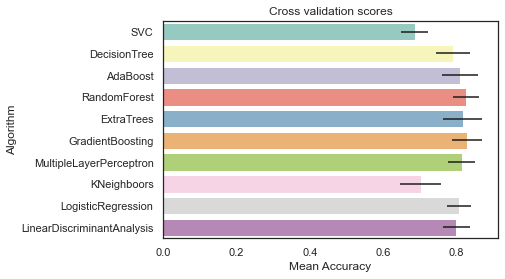

In [10]:
#We can also plot the results...
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [11]:
#We choose the 5 best performing algorithms for ensambling and we will see...

In [12]:
#3. Hyperparameter  tuning for getting the best models

#RANDOM FOREST
RFC = RandomForestClassifier()

#Search grid for optimal parameters
rf_param_grid = {"max_depth": [None], "max_features": [1,3,10],
                "min_samples_split": [2,3,10],
                "min_samples_leaf": [1,3,10],
                "bootstrap": [False],
                "n_estimators": [100,300],
                "criterion": ["gini"]}

gsRFC = GridSearchCV(RFC, param_grid = rf_param_grid, cv = kfold, scoring = "accuracy",
                    n_jobs = 1, verbose = 1)

gsRFC.fit(X_train, y_train)
    
RFC_best = gsRFC.best_estimator_

#Best score
gsRFC.best_score_



Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  1.5min finished


0.8357785602503911

In [13]:
RFC_best

RandomForestClassifier(bootstrap=False, max_features=3, min_samples_leaf=10,
                       n_estimators=300)

In [14]:
#EXTRA TREES
ExtC = ExtraTreesClassifier()

#Search grid for optimal parameters
rf_param_grid = {"max_depth": [None], "max_features": [1,3,10],
                "min_samples_split": [2,3,10],
                "min_samples_leaf": [1,3,10],
                "bootstrap": [False],
                "n_estimators": [100,300],
                "criterion": ["gini"]}

gsExtC = GridSearchCV(ExtC, param_grid = rf_param_grid, cv = kfold, scoring = "accuracy",
                    n_jobs = 1, verbose = 1)

gsExtC.fit(X_train, y_train)
    
ExtC_best = gsExtC.best_estimator_

#Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  1.3min finished


0.8427034428794993

In [15]:
#GRADIENT BOOSTING

GBC = GradientBoostingClassifier()

#Search grid for optimal parameters
rf_param_grid = {"loss": ["deviance"],
                 "n_estimators": [100,200, 300, 500, 1000],
                 "learning_rate": [0.1, 0.05, 0.01, 1],
                "max_depth": [4, 8], 
                "min_samples_leaf": [100, 150],
                 "max_features": [0.3, 0.1],
                }

gsGBC = GridSearchCV(GBC, param_grid = rf_param_grid, cv = kfold, scoring = "accuracy",
                    n_jobs = 1, verbose = 1)

gsGBC.fit(X_train, y_train)
    
GBC_best = gsGBC.best_estimator_

#Best score
gsGBC.best_score_


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:  4.4min finished


0.8329616588419405

In [16]:
#LINEAR DISCRIMINANT ANALYSIS
LDA = LinearDiscriminantAnalysis()

grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']

gsLDA = GridSearchCV(LDA, grid, scoring='accuracy', cv= kfold, n_jobs=-1)

gsLDA.fit(X_train, y_train)

LDA_best = gsLDA.best_estimator_

#Best score
gsLDA.best_score_


0.7992762128325509

In [17]:
#ADABOOST metamodel with Decision Trees

# DTC = DecisionTreeClassifier()

# adaDTC = AdaBoostClassifier(DTC, random_state= 7)

# ada_param_grid = {"base_estimator__criterion": ["gini", "entropy"],
#                  "base_estimator__splitter":["best", "random"],
#                      "algorithm":["SAMME", "SAMME.R"],
#                      "n_estimators": [1,2,50, 100, 500],
#                  "learning_rate": [0.0001, 0.001, 0.01, 0.1,0.5,  1.0, 1.5]}

# gsadaDTC = GridSearchCV(adaDTC, param_grid = ada_param_grid, cv = kfold, scoring = "accuracy",
#                     n_jobs = 1, verbose = 1)

# gsadaDTC.fit(X_train, y_train)

# ada_best = gsadaDTC.best_estimator_

# gsadaDTC.best_score_

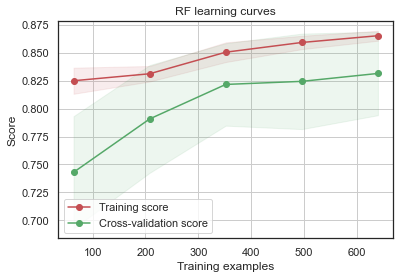

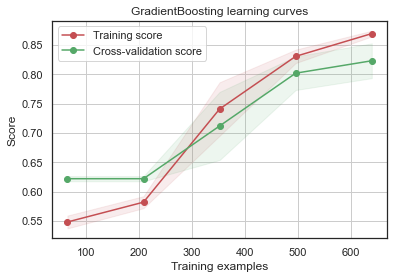

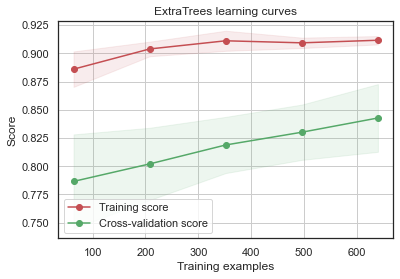

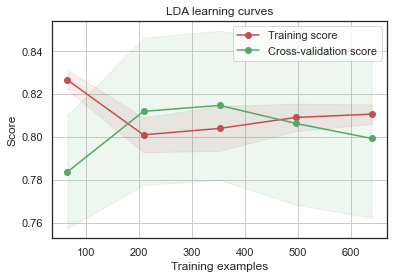

In [18]:
##LEARNING CURVES FOR ANALYSIS OF THE ALGORITHMS
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsLDA.best_estimator_,"LDA learning curves",X_train,y_train,cv=kfold)
# g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,y_train,cv=kfold)


AttributeError: 'LinearDiscriminantAnalysis' object has no attribute 'feature_importances_'

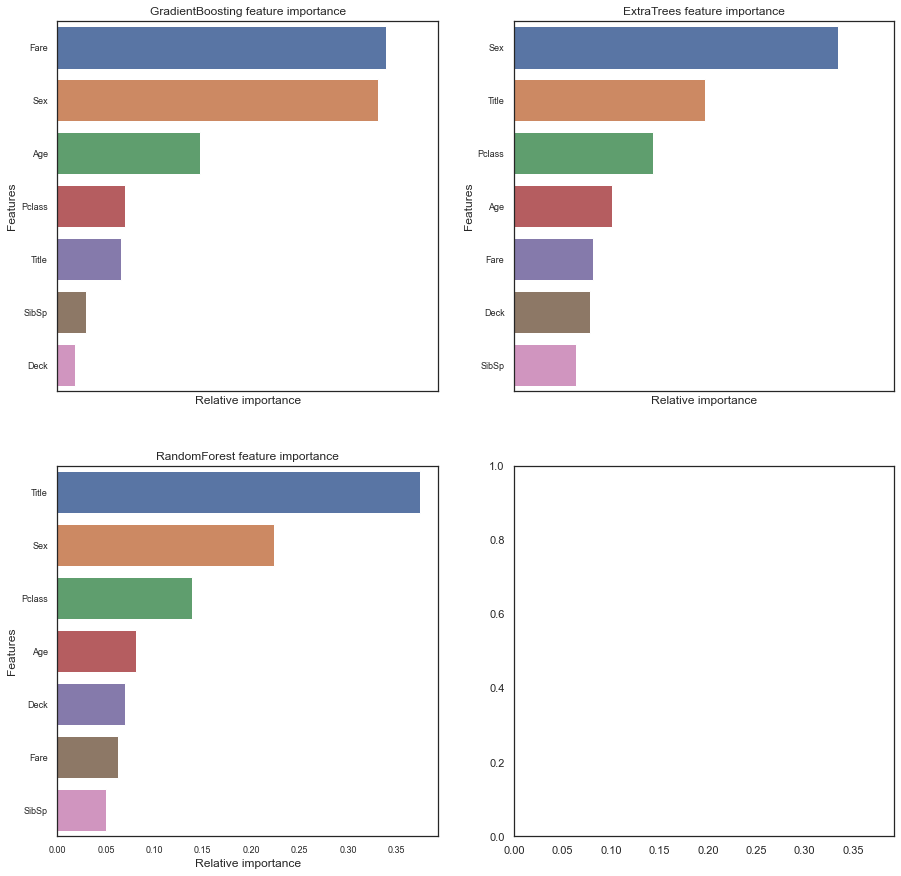

In [19]:
##FEATURE IMPORTANCE
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

# names_classifiers = [("GradientBoosting",GBC_best),("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best), 
#                     ("LinearDiscriminantAnalysys",LDA_best)]

names_classifiers = [("GradientBoosting",GBC_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best), 
                    ("LinearDiscriminantAnalysys",LDA_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

In [ ]:
###EVALUATION ON THE VALIDATION SET...

In [29]:
mods = {"gsRFC": gsRFC, "gsGBC":gsGBC, "gsExtC":gsExtC, "gsLDA":gsLDA}
def val_scores(mods, X_val, y_val):
    scores =pd.DataFrame(columns = ["Model", "Accuracy", "F1_Score"])
    for model in mods:
        scores = scores.append({"Model":model, "Accuracy":accuracy_score(mods[model].predict(X_val), y_val),
                               "F1_Score":metrics.f1_score(mods[model].predict(X_val), y_val)},
                               ignore_index=True )
    return scores

In [31]:
val_scores(mods, X_val, y_val).sort_values(by = "Accuracy", ascending = False)

NameError: name 'X_val' is not defined

In [ ]:
k2 = test_scores(mods, X_test, y_test).sort_values(by = "Accuracy", ascending = False).copy()
k2.to_csv("k2.csv", index = False)

In [20]:
###SUBMITION MODULE TO KAGGLE USING THE TEST SET

#Prepare test set
out = test.pop("Survived")
test = test


In [27]:
#Make a predicti0on with the selected model and feature set
y_pred = (0.4 * gsRFC.predict(test) + 0.4 * gsGBC.predict(test) + 0.2 * gsExtC.predict(test))



In [28]:

###CREATE THE SUBMISSION FILE
# Prepare Submission File

%store -r test_ID

submit3 = pd.DataFrame()
submit3['PassengerId'] = test_ID
submit3['Survived'] = y_pred
submit3['Survived'] = submit3['Survived'].apply(lambda x:1 if x >=0.5 else 0)
# submit = submit.set_index("PassengerId")
# ----------------------------- Create File to Submit --------------------------------
submit3.to_csv('25_sub.csv', index = False)
submit3.head(20)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


# Summary of today´s operations
**Operations**
0) Split train set into train and validation sets
1) Run the models and pick the one with the lowest validation error \
2) I use the test set (X_val, y_val )as the evaluation of the 
(model, features set) chosen each time I make an adjustment\
3) Afterwards, check the feature importance and select the most relevant  features, update the dataset with them and go to (1) 
and validate in validation set \
4) Now I will wait and try some submissions to Kagle to evaluate using the Test Set


Unitl now, the best performing algotihm/features tuple is: \
Model: gsExtC \
Features: (['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Deck', 'Title'] \
Accuracy: 0.8101, F1: 0.7344\

Also: GB with Accuracy: 0.8045, F1: 0.7368



# Texto acá
**Título en negrita
texto\
para hacerlo primero se va a Markdown arriba y se elige header (con eso se genera un gran título)


In [1]:
%store mods

UsageError: Unknown variable 'mods'
